In [52]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.integrate import quad
from scipy.optimize import curve_fit
from numpy import exp
from numpy import sin
from numpy import tanh


In [2]:
def e(z):
    return sin(z*5)/2 + 0.5

In [23]:
def H(z,c1,c2):
    return -tanh(((c2+c1)*(z-(c2+c1)/2))/(c2-c1))

In [4]:
def l (z,s):
    return e(z)/(1+exp(-a1*s+b1)) + (1-e(z))/(1+exp(-a2*s+b2))

In [21]:
def l_diff(z,s,a1,b1,a2,b2):
    return e(z) * (a1*exp(-a1*s+b1))/(1+exp(-a1*s+b1))**2 + (1-e(z)) * (a2*exp(-a2*s+b2))/(1+exp(-a2*s+b2))**2 

In [25]:
def integral(s,z,a1,a2,b1,b2,c1,c2):
    return H(z-s,c1,c2)*l_diff(z,s,a1,b1,a2,b2)

In [29]:
def functional_integration(z,a1,a2,b1,b2,c1,c2):        
    return quad(integral, 0, z, args=(z,a1,a2,b1,b2,c1,c2))[0]

In [49]:
def get_magnetisation(z,a1,a2,b1,b2,c1,c2):
    vec_expint = np.vectorize(functional_integration)
    M = vec_expint(z,a1,a2,b1,b2,c1,c2)
    M[M > 0] = 1
    M[M < 0] = -1
    return M

In [10]:
a1 = 1.5
a2 = 3.7
b1 = 8
b2 = 5

c1 = 3
c2 = 5

In [50]:
M = get_magnetisation(np.linspace(0,10),1.5,3.7,8,5,3,5)

In [53]:
z = np.linspace(0,10)

In [ ]:
popt, pcov = curve_fit(get_magnetisation, z, M)

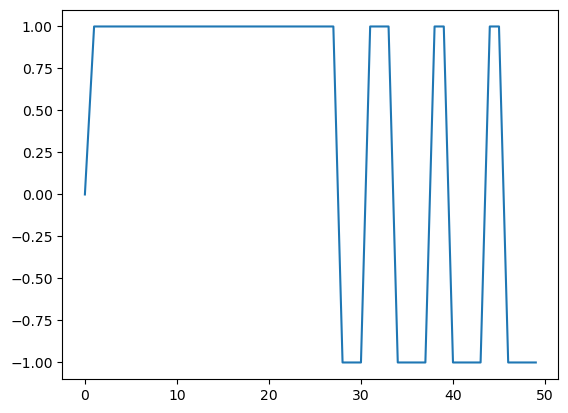

In [51]:
plt.plot(M)